# Principal Component Analysis (PCA)

Use PCA to reduce the dimensionality of a dataset using the Iris dataset.



In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# load the iris dataset
df = pd.read_csv('iris.csv')
print(df.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [3]:
# remove the id column from the dataset
df = df.drop('Id', axis=1)
print(df.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


In [4]:
# define features and target variable
X = df.drop('Species', axis=1)
y = df['Species']

In [5]:
# standardize the data to ensure PCA works optimally, since it is sensitive to the variances of the initial variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# check mean and variance after scaling
print("Mean after scaling:", np.mean(X_scaled, axis=0))
print("Variance after scaling:", np.var(X_scaled, axis=0))

Mean after scaling: [-4.73695157e-16 -6.63173220e-16  3.31586610e-16 -2.84217094e-16]
Variance after scaling: [1. 1. 1. 1.]


The data has been normalized since the mean and variance are [0, 1] respectively. PCA can now be applied to reduce the dataset to two principal components.

In [7]:
# apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Check shape of the PCA-transformed data
print("Shape of PCA-transformed data:", X_pca.shape)

Shape of PCA-transformed data: (150, 2)


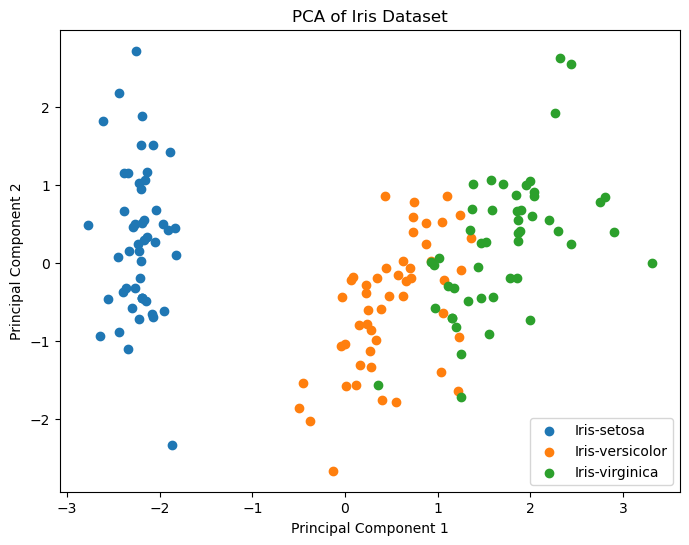

In [8]:
# visualize the PCA results
plt.figure(figsize=(8,6))
for species in np.unique(y):
    plt.scatter(X_pca[y == species, 0], X_pca[y == species, 1], label=species)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.show()

In [10]:
# check the explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each principal component:", explained_variance)
print("Total explained variance by the two principal components:", np.sum(explained_variance))

Explained variance by each principal component: [0.72770452 0.23030523]
Total explained variance by the two principal components: 0.9580097536148199
